# Fight Fare Prediction
---

In [89]:
# importing required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

sns.set()

In [2]:
#importing the dataset
train_data=pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#to see the first 5 records
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#to see the last 5 records
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#to see the count of rows and column inside dataset
train_data.shape

(10683, 11)

In [7]:
#to see the information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#to check the sum of na value in each column
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#to drop all the records[row] who have NA values
train_data.dropna(inplace=True)

In [10]:
#again check the the sum of na value in each column
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#to check the count of each value in the column
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## EDA 
From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [12]:

train_data["Journey_Day"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_Month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#now as we have extracted the day and month from the date of journey hence we can drop the date of journey column
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data['dep_hour']=pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data['dep_minute']=pd.to_datetime(train_data["Dep_Time"]).dt.minute

#now as we have extracted the hours and minutes from the Dep_Time hence we can drop the Dep_Time column
train_data.drop('Dep_Time',axis=1,inplace=True)

In [17]:
#lets see the dateset now
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
# Arrival_Time is when a plane leaves the gate. 
# Similar to Departure time we can extract values from Arrival_Time

# Extracting Hours
train_data['Arrival_hour']=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
train_data['Arrival_Minute']=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#now as we have extracted the hours and minutes from the Arrival_Time hence we can drop the Arrival_Time column
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
#lets see the dateset now
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list

duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minutes
        else:
            duration[i] = "0h " + duration[i]          # Adds 0 Hours
            
Duration_Hours = []
Duration_Minutes = []

for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split("h")[0])) # Extract hours from duration
    Duration_Minutes.append(int(duration[i].split("m")[0].split()[-1])) # Extracts only minutes from duration

In [21]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data['Duration_Hours']=Duration_Hours
train_data['Duration_Minutes']=Duration_Minutes

In [22]:
train_data.drop('Duration',axis=1,inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

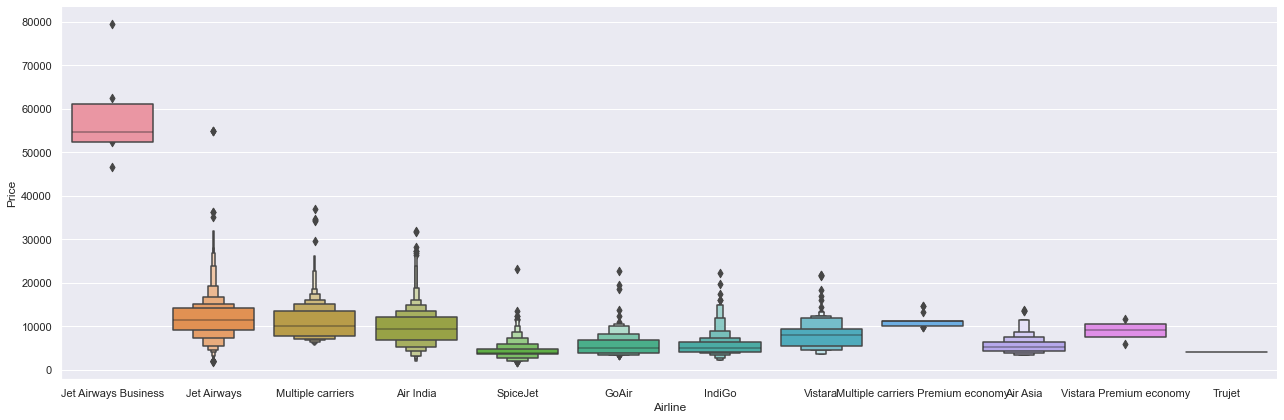

In [25]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [26]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [33]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train=train_data
train_data=pd.concat([train_data,Source,Destination,Airline],axis=1)

In [37]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [38]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [39]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [40]:
train_data.shape

(10682, 30)

# TEST Data

As this is the test set we have do the same preprocessing steps that we have already done for the train data set hence we have also not including the related comment for each of the action performed

In [41]:
test_data=pd.read_excel(r"Data_Test.xlsx")

In [42]:
pd.set_option('display.max_columns',None)

In [43]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [46]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
test_data['Journey_date']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [48]:
test_data['Dep_hr']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

test_data.drop('Dep_Time',axis=1,inplace=True)

In [49]:
test_data['Arrival_hr']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

test_data.drop('Arrival_Time',axis=1,inplace=True)

In [50]:
duration=list(test_data['Duration'])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))

test_data['duration_hours']=duration_hours
test_data['duration_minutes']=duration_minutes

test_data.drop('Duration',axis=1,inplace=True)

In [51]:
Airline=test_data[['Airline']]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [52]:
Source=test_data[['Source']]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [53]:
Destination=test_data[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [54]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [55]:
test_data=pd.concat([test_data,Airline,Source,Destination], axis=1)

In [56]:
test_data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [57]:
test_data.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [58]:
test_data.head()

,Total_Stops,Journey_date,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
test_data.shape

(2671, 28)

## Feature Selection

In [60]:
#to check the shape of the train set
train_data.shape

(10682, 30)

In [61]:
#to check the columns of train data set
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'dep_hour',
       'dep_minute', 'Arrival_hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [62]:
#to divide the data into X and y variable for splitting further [not including the target variable i.e Price]
X = train_data.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'dep_hour',
       'dep_minute', 'Arrival_hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [63]:
#to create the target variable y i.e price
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

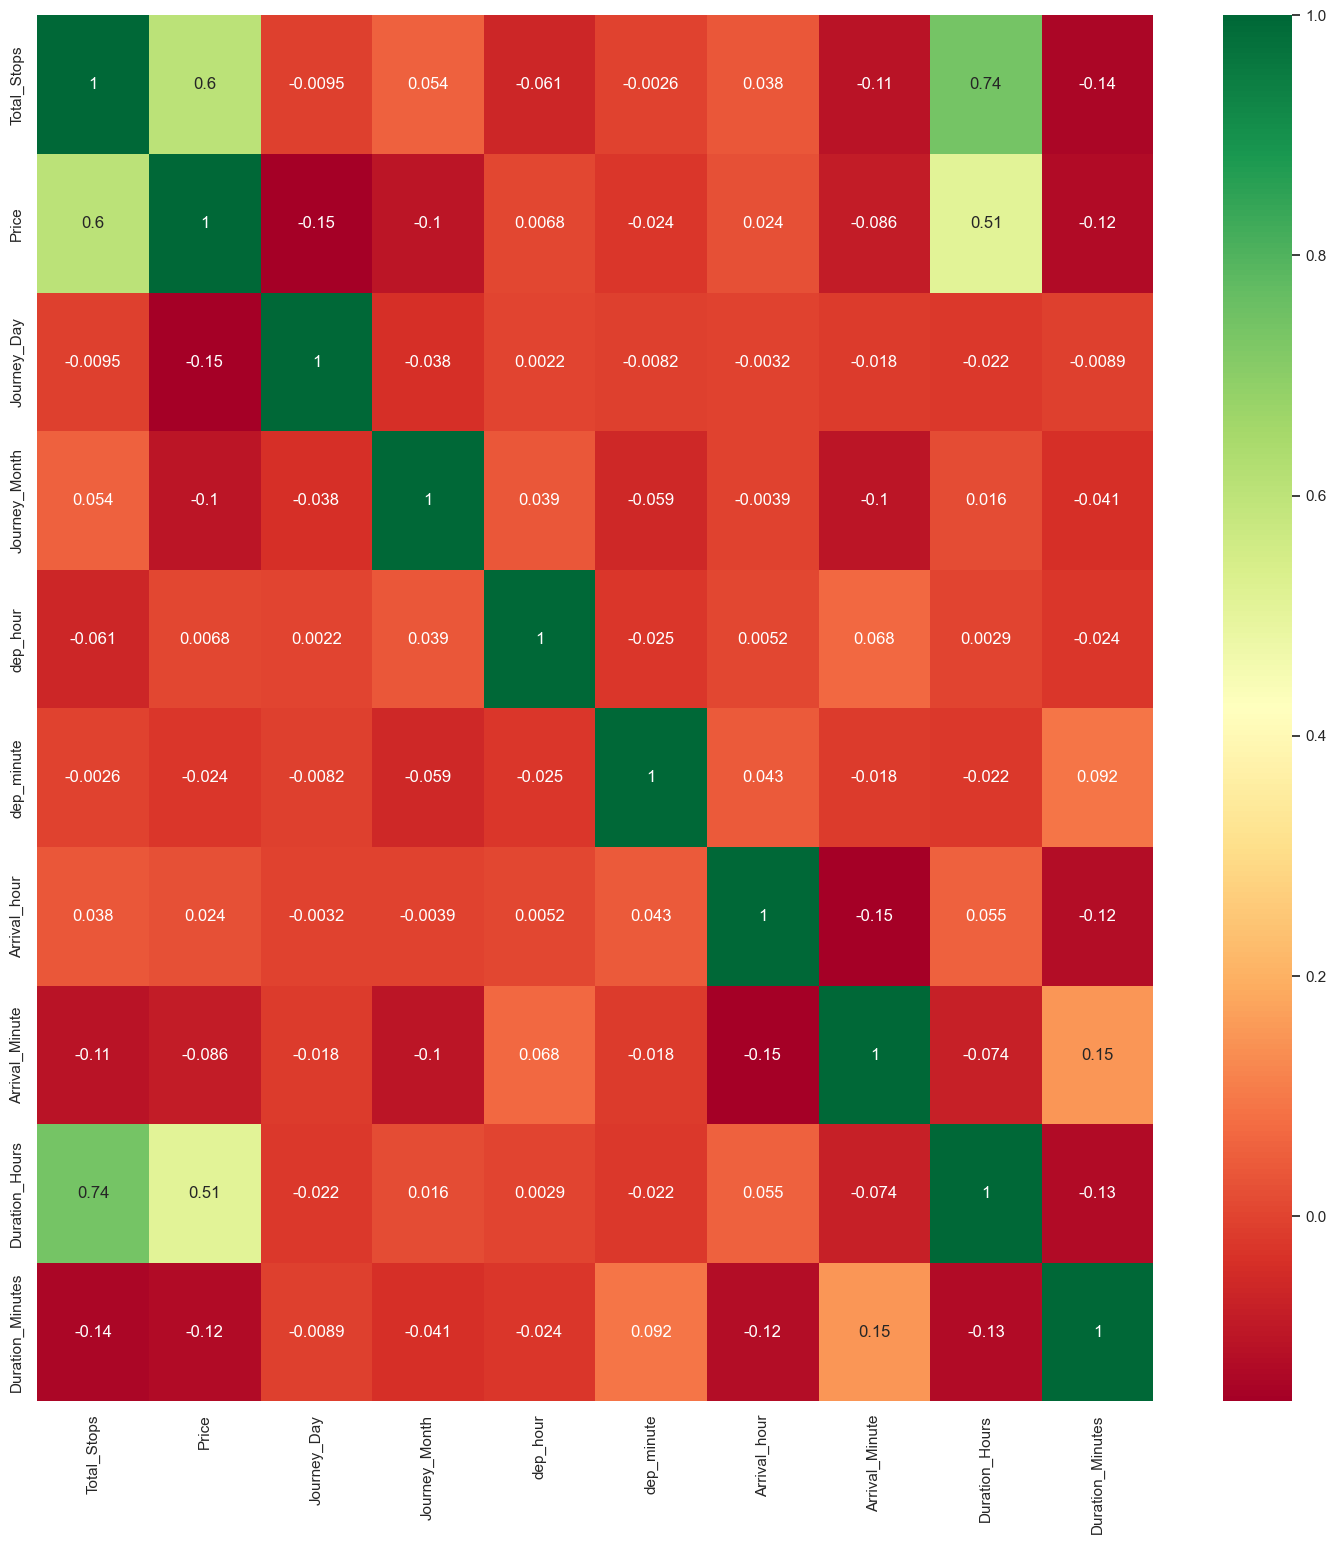

In [64]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [65]:
#function to find the columns that are having the maximum correlation and to get that we have a threshold value
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
#calling the above function train data set and some specified threshold value and data set- data_train[check cell number 36]
corr_features=correlation(data_train,0.7)
len(set(corr_features))

1

In [67]:
#name of the column which is highly correlated and can be removed
corr_features

{'Duration_Hours'}

In [68]:
#dropping the column Duration_Hours as it is highly correlated with the column Total_Stop and either of them can be removed
#from the data set to make our model more efficient as we have to remove the column from the train_data[working] set

train_data.drop('Duration_Hours',axis=1,inplace=True)

In [69]:
#to find the Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[2.12349166e-01 1.44146513e-01 5.34475472e-02 2.38615522e-02
 2.15716607e-02 2.77259677e-02 1.88242841e-02 1.39655754e-01
 1.74252843e-02 9.60967211e-03 1.89757533e-03 1.82187396e-02
 1.36598080e-01 6.75322792e-02 1.81672455e-02 8.20504301e-04
 2.93274073e-03 9.35841476e-05 5.05480736e-03 7.64921644e-05
 4.94587950e-04 7.54801319e-03 3.10100638e-03 6.48294901e-03
 9.19310998e-03 1.97406832e-02 8.15635355e-03 5.57433737e-04
 2.47164138e-02]


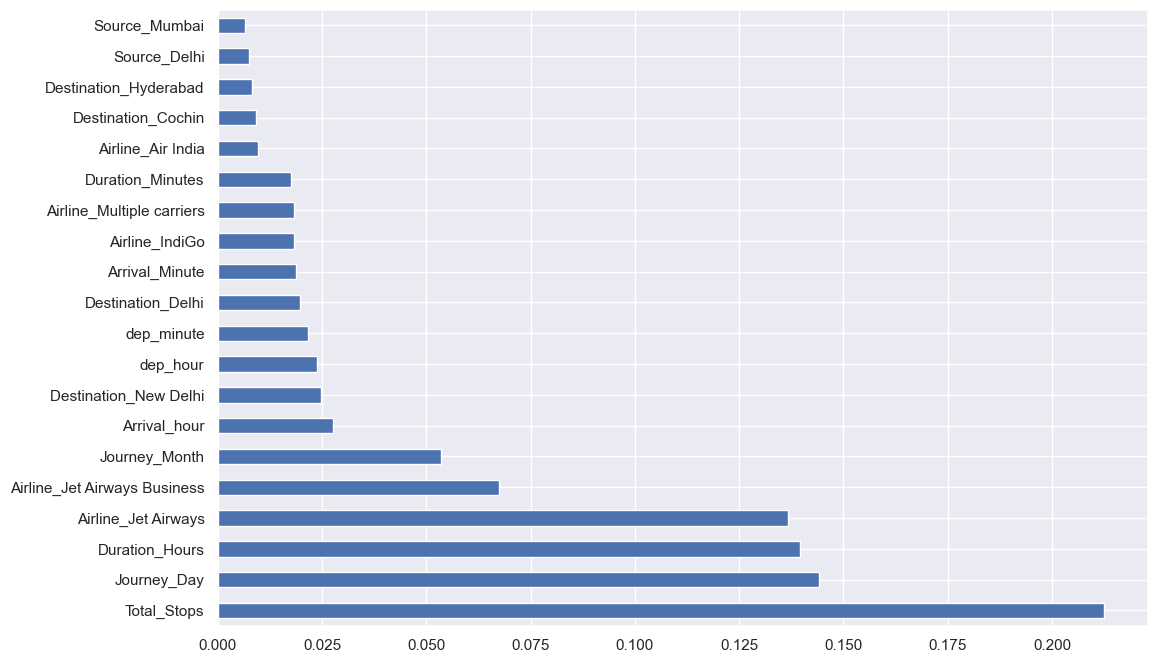

In [71]:
plt.figure(figsize=(12,8))
feat_impotance=pd.Series(selection.feature_importances_,index=X.columns)
feat_impotance.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
#to predict the X_test values
y_pred=regressor.predict(X_test)

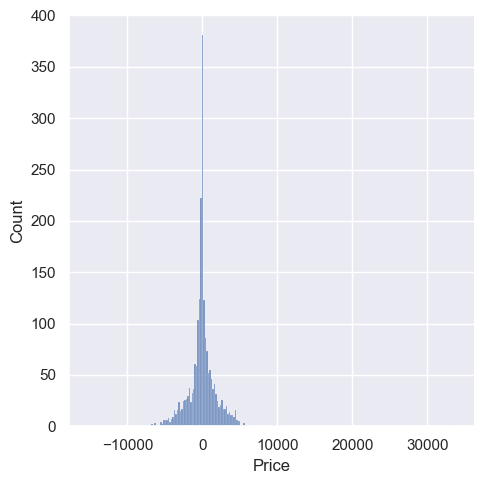

In [75]:
sns.displot(y_test-y_pred)
plt.show()

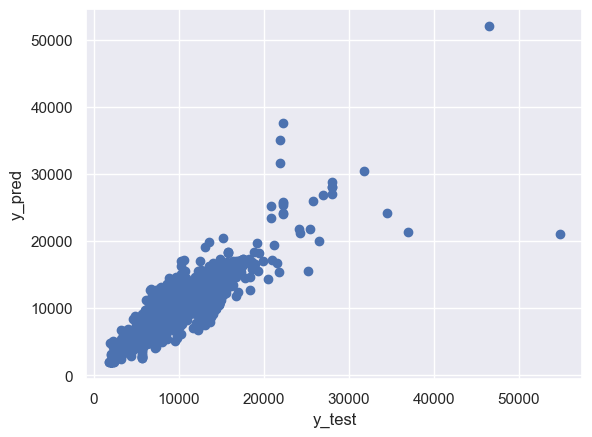

In [76]:
#plotting the scatter plot of y_test and y_pred
plt.scatter(y_test, y_pred, color='b')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
# Regression Metrics
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

MAE: 1218.7422997413728
MSE: 4071609.8154408745
RMSE: 2017.8230386832427
R2 Score: 0.8014884075467577


## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV** --> search whole parameter for the best params
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=50)]

max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

max_features=['auto','sqrt']

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [81]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [82]:
random_reg=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,n_iter=10,scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=42,verbose=False)

In [83]:
random_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 108, 116, 124,
                                                         132, 140, 148, 157,
                                                         165, 173, 181, 189,
                                                         197, 206, 214, 222,
                                                         230, 238, 246, 255,
                                                         263, 271, 279, 287,
                                                         295, 304, 312, 320,
                                                         328, 336, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=False)

In [84]:
prediction=random_reg.predict(X_test)

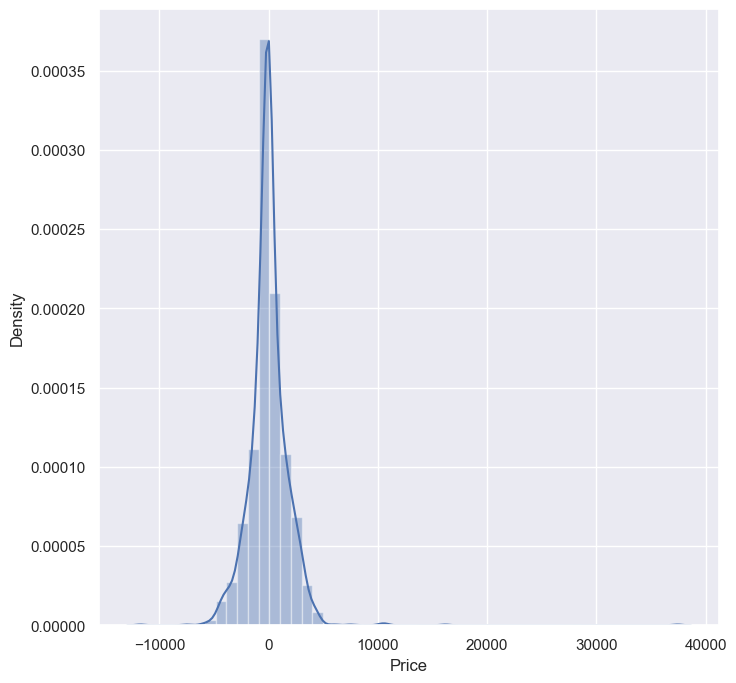

In [85]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

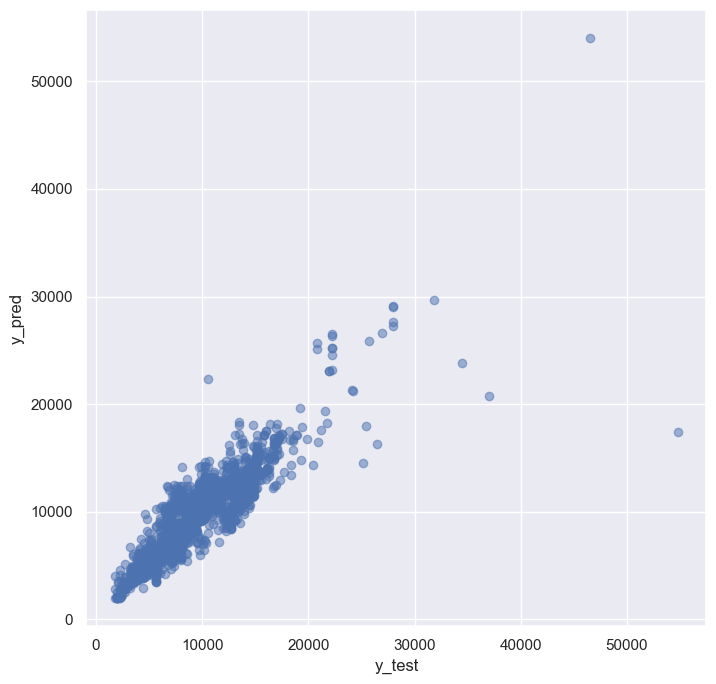

In [86]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 Score:',metrics.r2_score(y_test, prediction))

MAE: 1173.7049527328875
MSE: 3523668.61501744
RMSE: 1877.1437385073739
R2 Score: 0.828203315211607


## Exporting the Model

In [90]:
pickle.dump(regressor,open('model.pkl','wb'))